## Project Description
The Nobel Prize is perhaps the world's most well known scientific award. Every year it is given to scientists and scholars in chemistry, literature, physics, medicine, economics, and peace. The first Nobel Prize was handed out in 1901, and at that time the prize was Eurocentric and male-focused, but nowadays it's not biased in any way. Surely, right?

Well, let's find out! What characteristics do the prize winners have? Which country gets it most often? And has anybody gotten it twice? It's up to you to figure this out.

The dataset used in this project is from The Nobel Foundation on Kaggle.

## Guided Project
In this project, you will use your data manipulation and visualization skills to explore patterns and trends over 100 years worth of Nobel Prize winners.

### This project comes from Datacamp Guide and only for practice 
https://app.datacamp.com/learn/projects/nobel-winners/guided/Python

### 說明：
資料來源為kaggle而解題步驟則是參考DataCamp的Project, 因為資料集有一些不同，所以做了一些調整以符合資料集需求。  

In [51]:
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 1. Import Dataset from Kaggle

https://www.kaggle.com/nobelfoundation/nobel-laureates

In [52]:
nobel = pd.read_csv('nobel.csv')
nobel.head(6)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany


## 2. Who gets the Nobel Prize?

In [53]:
# Display the number of (possibly shared) Nobel Prizes handed out between 1901 and 2016
display(len(nobel.Prize))

# Display the number of prizes won by male and female recipients.
display(nobel['Sex'].value_counts())

# Display the number of prizes won by the top 10 nationalities.
nobel['Birth Country'].value_counts().head(10)

969

Male      893
Female     50
Name: Sex, dtype: int64

United States of America    276
United Kingdom               88
Germany                      70
France                       53
Sweden                       30
Japan                        29
Russia                       20
Netherlands                  19
Canada                       18
Italy                        18
Name: Birth Country, dtype: int64

## 3. USA dominance? 

In [54]:
# Calculating the proportion of USA born winners per decade
nobel['usa_born_winner'] = np.where(nobel['Birth Country']=="United States of America", True, False)

nobel['decade'] = (np.floor(nobel['Year']/10)*10).astype('int64')

prop_usa_winners = nobel.groupby('decade', as_index=False)['usa_born_winner'].mean() 

# Display the proportions of USA born winners per decade
display(prop_usa_winners)

,decade,usa_born_winner
0,1900,0.017241
1,1910,0.075000
2,1920,0.074074
3,1930,0.241935
4,1940,0.288889
5,1950,0.278481
6,1960,0.262500
7,1970,0.308411
8,1980,0.313131
9,1990,0.392523


## 4. Visualized USA dominance 

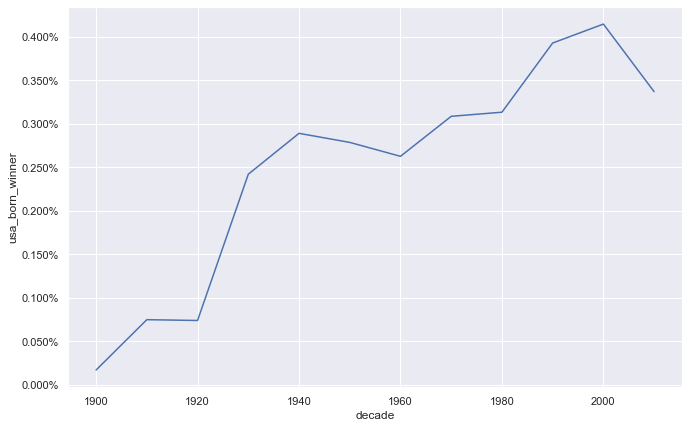

In [55]:
# Setting the plotting theme
sns.set()

# setting the size of all plots.
plt.rcParams['figure.figsize'] = [11, 7]

# Plotting USA born winners 
ax = sns.lineplot(data=prop_usa_winners, x='decade', y='usa_born_winner')


# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter())

## 5. What is the gender of a typical Nobel Prize winner?

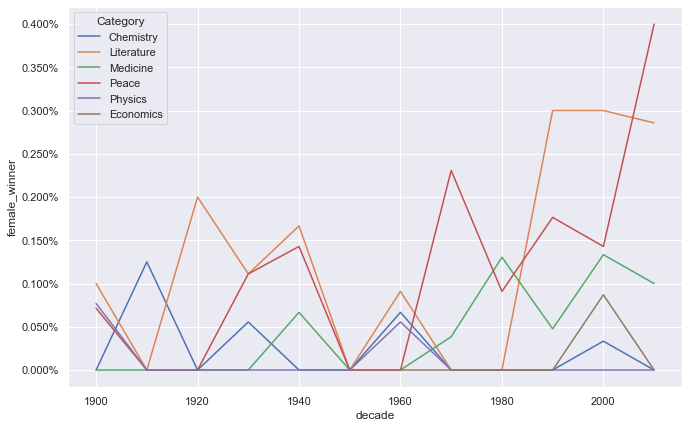

In [56]:
# Calculating the proportion of female laureates per decade
nobel['female_winner']= np.where(nobel['Sex']=="Female", True, False)
prop_female_winners =nobel.groupby(['decade','Category'], as_index=False)['female_winner'].mean() 

# Plotting USA born winners with % winners on the y-axis
ax=sns.lineplot(data=prop_female_winners, x='decade', y='female_winner', hue='Category')

ax.yaxis.set_major_formatter(PercentFormatter())


## 6. The first woman to win the Nobel Prize

In [57]:
# Picking out the first woman to win a Nobel Prize
nobel_woman=nobel[nobel.Sex == 'Female'].nsmallest(1, 'Year')
nobel_woman

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True


## 7. Repeat laureates

找出哪些學者得過不只一次諾貝爾獎


In [58]:
# Selecting the laureates that have received 2 or more prizes.
nobel.groupby('Full Name').filter(lambda x: len(x) >1)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True
46,1908,Medicine,The Nobel Prize in Physiology or Medicine 1908,"""in recognition of their work on immunity""",1/2,302,Individual,Paul Ehrlich,1854-03-14,Strehlen (Strzelin),...,Male,Goettingen University,Göttingen,Germany,1915-08-20,Bad Homburg vor der Höhe,Germany,False,1900,False
47,1908,Medicine,The Nobel Prize in Physiology or Medicine 1908,"""in recognition of their work on immunity""",1/2,302,Individual,Paul Ehrlich,1854-03-14,Strehlen (Strzelin),...,Male,Königliches Institut für experimentelle Therap...,Frankfurt-on-the-Main,Germany,1915-08-20,Bad Homburg vor der Höhe,Germany,False,1900,False
63,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1910,True
90,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1910,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,2014,Physics,The Nobel Prize in Physics 2014,"""for the invention of efficient blue light-emi...",1/3,906,Individual,Isamu Akasaki,1929-01-30,Chiran,...,Male,Nagoya University,Nagoya,Japan,NaN,NaN,NaN,False,2010,False
945,2015,Chemistry,The Nobel Prize in Chemistry 2015,"""for mechanistic studies of DNA repair""",1/3,921,Individual,Tomas Lindahl,1938-01-28,Stockholm,...,Male,Francis Crick Institute,Hertfordshire,United Kingdom,NaN,NaN,NaN,False,2010,False
946,2015,Chemistry,The Nobel Prize in Chemistry 2015,"""for mechanistic studies of DNA repair""",1/3,921,Individual,Tomas Lindahl,1938-01-28,Stockholm,...,Male,Clare Hall Laboratory,Hertfordshire,United Kingdom,NaN,NaN,NaN,False,2010,False
947,2015,Chemistry,The Nobel Prize in Chemistry 2015,"""for mechanistic studies of DNA repair""",1/3,922,Individual,Paul Modrich,1946-06-13,"Raton, NM",...,Male,Howard Hughes Medical Institute,"Durham, NC",United States of America,NaN,NaN,NaN,True,2010,False


## 8. How old are you when you get the prize?

In [86]:
# Converting birth_date from String to datetime
nobel['birth_year'] = nobel['Birth Date'].str[0:4].apply(pd.to_numeric)

這個資料檔如果單純的使用 nobel['birth_date'] = pd.to_datetime(nobel['Birth Date']) 的話，
會一直報錯：ParserError: month must be in 1..12: 1898-00-00

考慮題目只是需要轉出birth_year, 所以用str截取前四個字，再轉為數字格式

In [87]:
# Calculating the age of Nobel Prize winners
nobel['age'] = nobel['Year'] - nobel['birth_year']

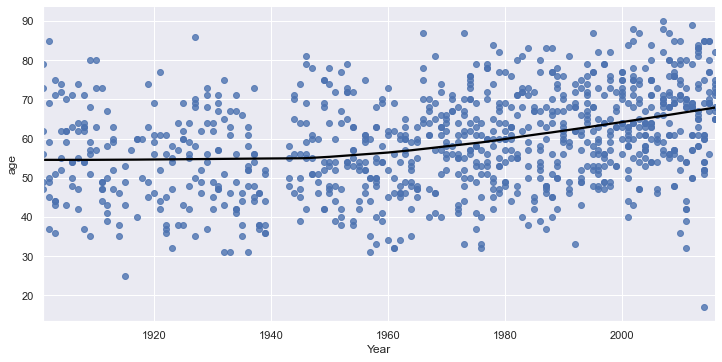

In [88]:
# Plotting the age of Nobel Prize winners
sns.lmplot(data=nobel, x='Year', y='age', lowess=True, aspect=2, line_kws={'color' : 'black'})

## 9. Age differences between prize categories

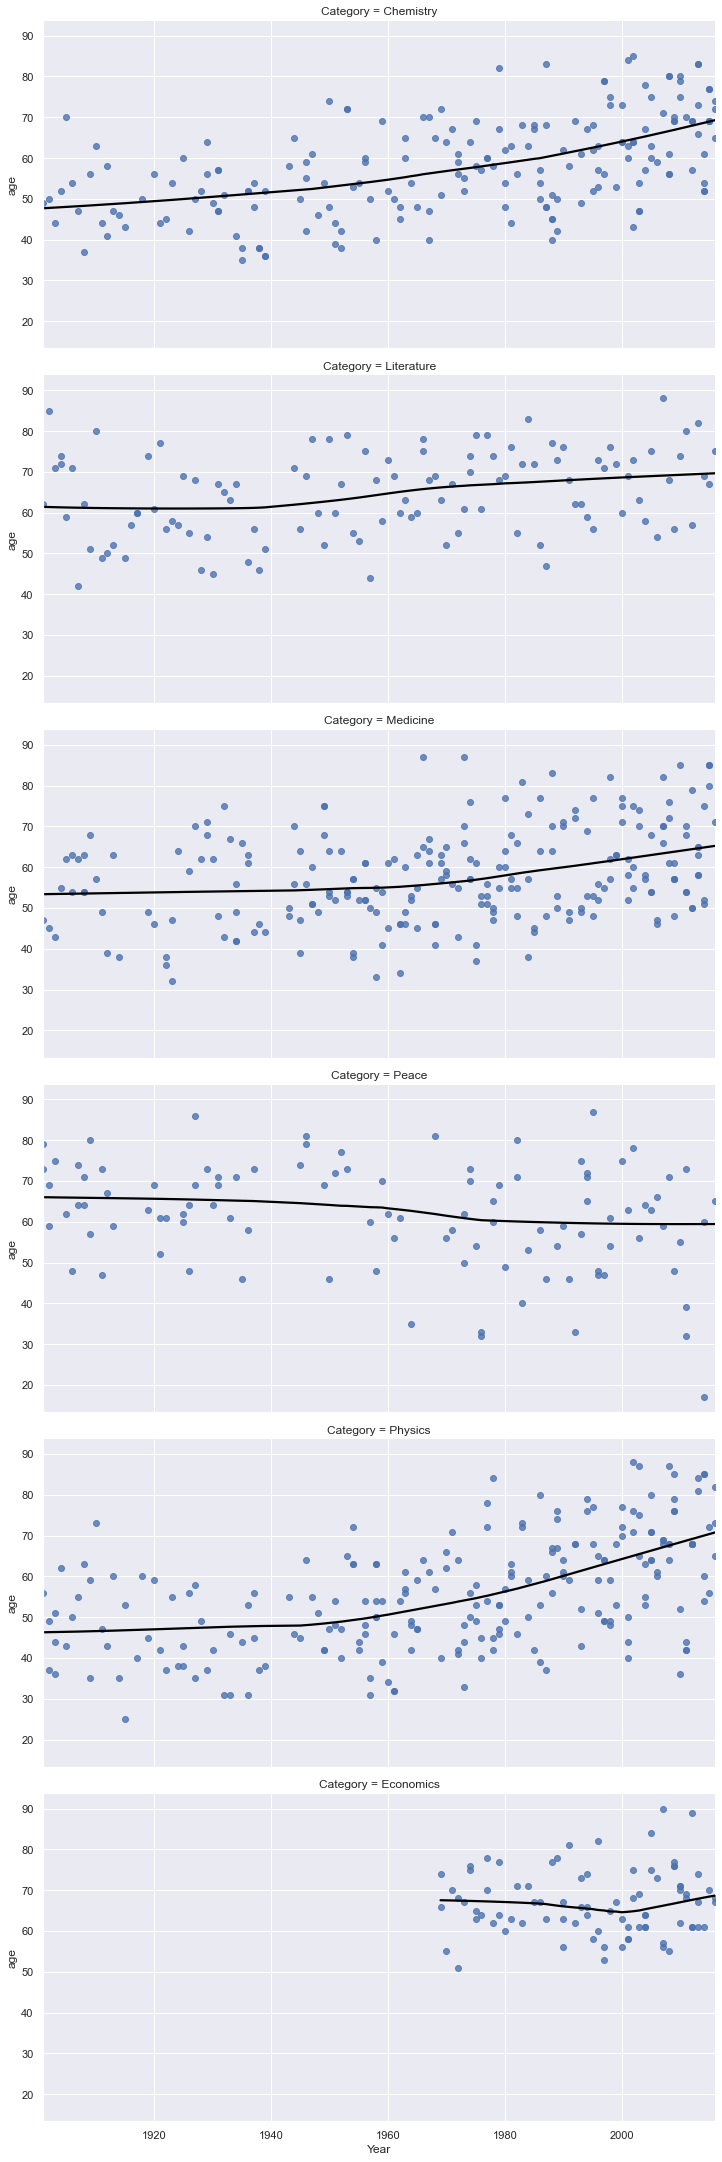

In [89]:
# Same plot as above, but separate plots for each type of Nobel Prize
sns.lmplot(data=nobel, x='Year', y='age', row='Category', lowess=True, aspect=2, line_kws={'color' : 'black'})

## 10. Oldest and youngest winners
截至2016年為止，諾貝爾獎史上年紀最長與最年輕的得主的資訊

In [119]:
# The oldest winner of a Nobel Prize as of 2016
print("The oldest winner of a Nobel Prize as of 2016")
display(nobel.nlargest(1, 'age'))
print('\n')
print("The youngest winner of a Nobel Prize as of 2016")
# The youngest winner of a Nobel Prize as of 2016
display(nobel.nsmallest(1, 'age'))


The oldest winner of a Nobel Prize as of 2016


,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Organization Country,Death Date,Death City,Death Country,usa_born_winner,decade,female_winner,birth_date,birth_year,age
825,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,...,United States of America,2008-06-24,"Minneapolis, MN",United States of America,False,2000,False,Ellipsis,1917.0,90.0




The youngest winner of a Nobel Prize as of 2016


,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Organization Country,Death Date,Death City,Death Country,usa_born_winner,decade,female_winner,birth_date,birth_year,age
940,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,...,NaN,NaN,NaN,NaN,False,2010,True,Ellipsis,1997.0,17.0


## 11. The youngest winners! 
截至2016年為止，諾貝爾獎史上最年輕的得主的名字

In [120]:
# The name of the youngest winner of the Nobel Prize as of 2016
youngest_winner = nobel.nsmallest(1, 'age')
youngest_winner['Full Name'].apply(lambda x: x.split()[0])

940    Malala
Name: Full Name, dtype: object